<a href="https://colab.research.google.com/github/carloscarvajal1cc/2019_ML_A3/blob/master/DVA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx

In [2]:
!pip install graphviz

In [0]:
!pip install -q pydot

In [4]:
!sudo apt-get install graphviz libgraphviz-dev pkg-config python-pip
!pip install pygraphviz --install-option="--include-path=/usr/include/graphviz" --install-option="--library-path=/usr/lib/graphviz/"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libpython-all-dev libxdot4 python-all python-all-dev
  python-asn1crypto python-cffi-backend python-crypto python-cryptography
  python-dbus python-enum34 python-gi python-idna python-ipaddress
  python-keyring python-keyrings.alt python-pip-whl python-pkg-resources
  python-secretstorage python-setuptools python-six python-wheel python-xdg
Suggested packages:
  gvfs python-crypto-doc python-cryptography-doc python-cryptography-vectors
  python-dbus-dbg python-dbus-doc python-enum34-doc python-gi-cairo
  gnome-keyring libkf5wallet-bin gir1.2-gnomekeyring-1.0 python-fs
  python-gdata python-keyczar python-secretstorage-doc python-setuptools-

In [5]:
!pip install markov_clustering[drawing]

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from graphviz import Digraph
from matplotlib.pyplot import figure
import pygraphviz as pgv
import markov_clustering as mc
import networkx as nx
import numpy as np
import pandas as pd
import io
from matplotlib.lines import Line2D






TacmeNetwork = nx.Graph()
TacmeNetwork.add_edge('0','1', weight = 1)
TacmeNetwork.add_edge('0','2', weight = 1)
TacmeNetwork.add_edge('1','2', weight = 1)

TacmeNetwork.add_edge('2','3', weight = 2)
TacmeNetwork.add_edge('2','4', weight = 2)
TacmeNetwork.add_edge('2','5', weight = 3)

TacmeNetwork.add_edge('3','6', weight = 4)
TacmeNetwork.add_edge('3','7', weight = 5)
TacmeNetwork.add_edge('3','8', weight = 5)

TacmeNetwork.add_edge('4','9', weight = 6)
TacmeNetwork.add_edge('4','10', weight = 4)
TacmeNetwork.add_edge('4','11', weight = 5)
TacmeNetwork.add_edge('4','12', weight = 7)
TacmeNetwork.add_edge('4','13', weight = 4)
TacmeNetwork.add_edge('4','14', weight = 5)

TacmeNetwork.add_edge('5','15', weight = 5)
TacmeNetwork.add_edge('5','16', weight = 3)
TacmeNetwork.add_edge('5','17', weight = 5)

TacmeNetwork.add_edge('6','7', weight = 3)
TacmeNetwork.add_edge('6','8', weight = 4)

TacmeNetwork.add_edge('7','8', weight = 4)

TacmeNetwork.add_edge('9','10', weight = 2)
TacmeNetwork.add_edge('9','11', weight = 4)
TacmeNetwork.add_edge('9','12', weight = 7)
TacmeNetwork.add_edge('9','13', weight = 2)
TacmeNetwork.add_edge('9','14', weight = 4)

TacmeNetwork.add_edge('10','11', weight = 5)
TacmeNetwork.add_edge('10','12', weight = 5)
TacmeNetwork.add_edge('10','13', weight = 4)
TacmeNetwork.add_edge('10','14', weight = 3)

TacmeNetwork.add_edge('11','12', weight = 3)
TacmeNetwork.add_edge('11','13', weight = 4)

TacmeNetwork.add_edge('12','14', weight = 3)

TacmeNetwork.add_edge('15','16', weight = 3)
TacmeNetwork.add_edge('15','17', weight = 4)

TacmeNetwork.add_edge('16','17', weight = 5)

TacmeNetwork.add_edge('17','7', weight = 1)

TacmeNetwork.add_edge('16','6', weight = 2)
TacmeNetwork.add_edge('16','7', weight = 2)
TacmeNetwork.add_edge('16','8', weight = 3)
TacmeNetwork.add_edge('16','9', weight = 2)
TacmeNetwork.add_edge('16','11', weight = 2)
TacmeNetwork.add_edge('16','13', weight = 2)
TacmeNetwork.add_edge('16','14', weight = 2)
TacmeNetwork.add_edge('16','10', weight = 2)


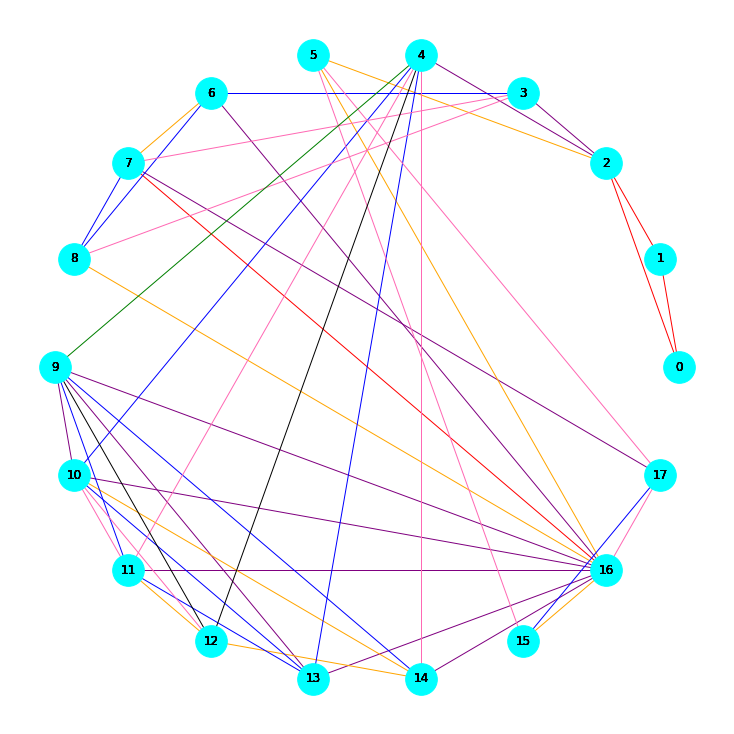

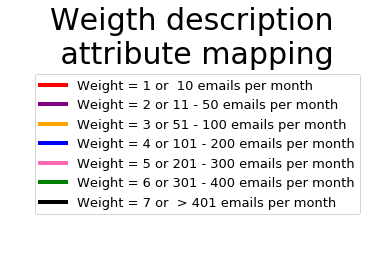

In [27]:
nx.spring_layout(TacmeNetwork)
plt.figure(figsize=(10,10))
nx.draw_shell(TacmeNetwork, with_labels=True, 
              edgelist = [('0', '1'), ('0', '2'),
                          ('1', '2'), ('16', '7')], edge_width = 50, edge_color = 'red')
nx.draw_shell(TacmeNetwork, with_labels=True, 
              edgelist = [('2', '3'), ('2', '4'),
                          ('9', '10'), ('9', '13'),
                         ('16','6'), ('17','7'),
                         ('16','9'), ('16','11'),
                         ('16','13'),('16','14'),('16','10')],
              edge_color = 'purple', edge_width = 50)
nx.draw_shell(TacmeNetwork, with_labels=True, 
              edgelist = [('2', '5'), ('5', '16'),
                          ('6', '7'), ('10', '14'),
                         ('11','12'), ('12','14'),
                         ('15','16'), ('16','8')],
              edge_color = 'orange', edge_width = 50)
nx.draw_shell(TacmeNetwork, with_labels=True, 
              edgelist = [('3', '6'), ('4', '10'),
                          ('4', '13'), ('6', '8'),
                         ('7','8'), ('9','11'),
                         ('9','14'), ('10','13'),
                         ('11','13'),('15','17')],
              edge_color = 'blue', edge_width = 50)
nx.draw_shell(TacmeNetwork, with_labels=True, 
              edgelist = [('3', '7'), ('3', '8'),
                          ('4', '11'), ('4', '14'),
                         ('5','15'), ('5','17'),
                         ('10','11'), ('10','12'),
                         ('16','17')],
              edge_color = 'hotpink', edge_width = 50)
nx.draw_shell(TacmeNetwork, with_labels=True, 
              edgelist = [('4', '9')],
              edge_color = 'green', edge_width = 50)
nx.draw_shell(TacmeNetwork, with_labels=True, 
              edgelist = [('4', '12'), ('9', '12')],
              edge_color = 'black', node_color = 'cyan', node_size= 1000, edge_width = 50)


custom_lines = [Line2D([0], [0], color='Red', lw=4),
                Line2D([0], [0], color='Purple', lw=4),
                Line2D([0], [0], color='Orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='hotpink', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='black', lw=4)]

fig, ax = plt.subplots()
plt.suptitle('Weigth description\n attribute mapping', fontsize=30)
plt.axis('off')
ax.legend(custom_lines, ['Weight = 1 or  10 emails per month',
                         'Weight = 2 or 11 - 50 emails per month',
                         'Weight = 3 or 51 - 100 emails per month',
                         'Weight = 4 or 101 - 200 emails per month',
                         'Weight = 5 or 201 - 300 emails per month',
                         'Weight = 6 or 301 - 400 emails per month', 
                         'Weight = 7 or  > 401 emails per month'],
         loc = 'center', fontsize=13)

In [0]:
#The number of nodes in this network is

TacmeNetwork.number_of_nodes()


18

In [0]:
#The number of edges in this network is:

TacmeNetwork.number_of_edges()

45

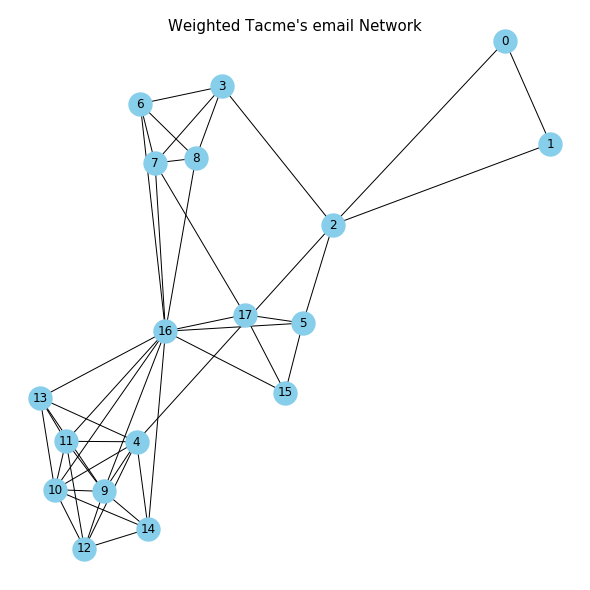

In [89]:
plt.figure(figsize=(8,8))
plt.suptitle("Weighted Tacme's email Network", fontsize=15)
print(" ")

nx.draw_spring(TacmeNetwork, with_labels=True,  node_size=500,
               node_color='skyblue', linewidths=2, overlap = False)

plt.show()

<Figure size 1800x1800 with 0 Axes>

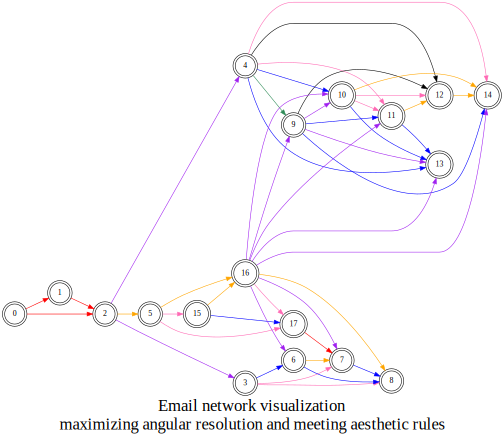

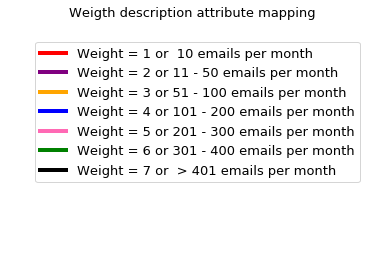

In [100]:
# Drawing using curve lines to meet aesthetic rules, minimize edge crossing and
# maximize angular resolution

plt.figure(figsize=(25,25))
f = Digraph()
f.attr(rankdir='LR', size='7')
f.attr('node', shape='doublecircle')
f.node('0')
f.node('1')
f.node('2')
f.node('3')
f.node('4')
f.node('5')
f.node('6')
f.node('7')
f.node('8')
f.node('9')
f.node('10')
f.node('11')
f.node('12')
f.node('13')
f.node('14')
f.node('15')
f.node('16')
f.node('17')
f.attr('node', shape='circle')
f.edge('0', '1', color = 'Red')
f.edge('0', '2', color = 'Red')
f.edge('1', '2', color = 'Red')
f.edge('2', '3', color = 'purple')
f.edge('2', '4', color = 'purple')
f.edge('2', '5', color = 'orange')
f.edge('3', '6', color = 'blue')
f.edge('3', '7', color='hotpink')
f.edge('3', '8', color='hotpink')
f.edge('4', '9', color='seagreen')
f.edge('4', '10', color = 'blue')
f.edge('4', '11', color='hotpink')
f.edge('4', '12', color='black')
f.edge('4', '13', color = 'blue')
f.edge('4', '14', color='hotpink')
f.edge('5', '15', color='hotpink')
f.edge('5', '16', color = 'orange')
f.edge('5', '17', color='hotpink')
f.edge('6', '7', color = 'orange')
f.edge('6', '8', color = 'blue')
f.edge('7', '8', color = 'blue')
f.edge('9', '10', color = 'purple')
f.edge('9', '11', color = 'blue')
f.edge('9', '12', label=' ', color='black')
f.edge('9', '13', color = 'purple')
f.edge('9', '14', color = 'blue')
f.edge('10', '11', color='hotpink')
f.edge('10', '12', color='hotpink')
f.edge('10', '13', color = 'blue')
f.edge('10', '14', color = 'orange')
f.edge('11', '12', color = 'orange')
f.edge('11', '13', color = 'blue')
f.edge('12', '14', color = 'orange')
f.edge('15', '16', color = 'orange')
f.edge('15', '17', color = 'blue')
f.edge('16', '17', color='hotpink')
f.edge('17', '7', color = 'Red')
f.edge('16', '6', color = 'purple')
f.edge('16', '7', color = 'purple')
f.edge('16', '8', color = 'orange')
f.edge('16', '9', color = 'purple')
f.edge('16', '11', color = 'purple')
f.edge('16', '13', color = 'purple')
f.edge('16', '14', color = 'purple')
f.edge('16', '10', color = 'purple')

plt.show()
f.attr(overlap='false')
f.attr(label=r'Email network visualization\n'
             r'maximizing angular resolution and meeting aesthetic rules')
f.attr(fontsize='30')
  

custom_lines = [Line2D([0], [0], color='Red', lw=4),
                Line2D([0], [0], color='Purple', lw=4),
                Line2D([0], [0], color='Orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='hotpink', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='black', lw=4)]
fig, ax = plt.subplots()
plt.suptitle('Weigth description attribute mapping', fontsize=13)
plt.axis('off')
ax.legend(custom_lines, ['Weight = 1 or  10 emails per month',
                         'Weight = 2 or 11 - 50 emails per month',
                         'Weight = 3 or 51 - 100 emails per month',
                         'Weight = 4 or 101 - 200 emails per month',
                         'Weight = 5 or 201 - 300 emails per month',
                         'Weight = 6 or 301 - 400 emails per month', 
                         'Weight = 7 or  > 401 emails per month'],
         loc = 'upper center', fontsize=13)

f

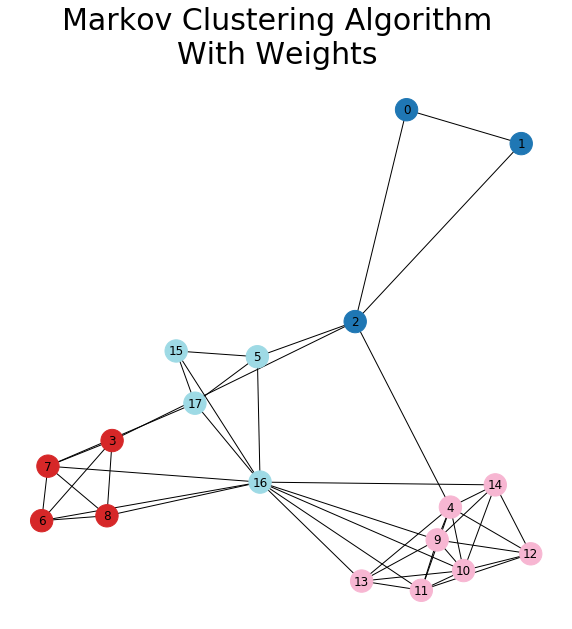

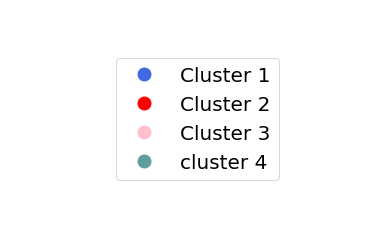

the clusters are: [(0, 1, 2), (3, 6, 7, 8), (4, 9, 10, 11, 12, 13, 14), (5, 15, 16, 17)]


In [129]:
#Markov cluster


#converting to matrix

matrix = nx.to_numpy_matrix(TacmeNetwork)


result = mc.run_mcl(matrix, inflation = 2.5)
clusters = mc.get_clusters(result)

plt.figure(figsize=(10,10))
plt.suptitle('Markov Clustering Algorithm\nWith Weights', fontsize=30)
d=mc.draw_graph(matrix, clusters,
              node_size=500, with_labels=True,
              edge_color="black")

legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor='royalblue', markersize=15,
                         label = 'Cluster 1' ),
                Line2D([0], [0], marker='o', color='w',
                       markerfacecolor='Red', markersize=15,
                      label = 'Cluster 2'),
                Line2D([0], [0], marker='o',color='w',
                       markerfacecolor='Pink', markersize=15,
                      label = 'Cluster 3'),
                Line2D([0], [0], marker='o',color='w', 
                       markerfacecolor='cadetblue', markersize=15,
                      label = 'cluster 4'),
]
plt.show()

fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center', fontsize = 20)
plt.axis('off')
plt.show()

print('the clusters are: {}'.format(clusters))

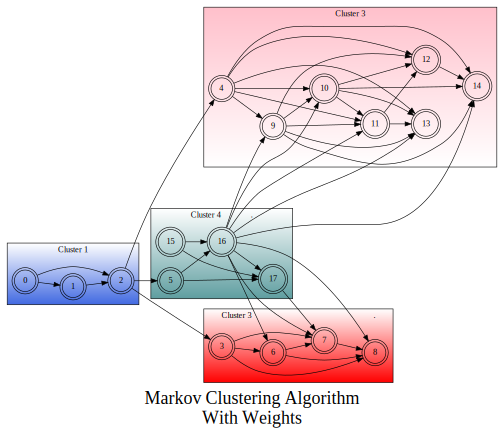

In [113]:
#Clustering according to Markov with weight

H = Digraph()
H.attr(rankdir='LR', size='7', compound='true')

H.attr('node', shape='doublecircle')
H.node('0')
H.node('1')
H.node('2')
H.node('3')
H.node('4')
H.node('5')
H.node('6')
H.node('7')
H.node('8')
H.node('9')
H.node('10')
H.node('11')
H.node('12')
H.node('13')
H.node('14')
H.node('15')
H.node('16')
H.node('17')


H.attr('node', shape='circle')

with H.subgraph(name='cluster0') as c:
    c.attr(fillcolor='royalblue:white',
           style='filled', gradientangle='90', label='Cluster 1')
    c.edges([('0','1'),('0','2'), ('1','2')])

with H.subgraph(name='cluster1') as c:
    c.attr(fillcolor='cadetblue:white',
           style='filled', gradientangle='90', label='Cluster 4               .')
    c.edges([('5','16'),('5','17'),('15','17'),('15','16'),('16','17')])
    
with H.subgraph(name='cluster2') as c:
    c.attr(fillcolor='red:white',
           style='filled', gradientangle='90', label='Cluster 3                                                             .')
    c.edges([('3','6'),('3','8'),('3','7'),
             ('6','7'),('6','8'),('7','8')])
    
with H.subgraph(name='cluster3') as c:
    c.attr(fillcolor='pink:white',
           style='filled', gradientangle='270', label='Cluster 3')
    c.edges([('4','14'), ('4','12'),('4','11'),('4','10'),('4','9'),
             ('4','13'),('9','12'),('9','10'),('9','11'),('9','13'),('9','14'),
             ('10','14'),('10','12'),('10','11'),('10','13'),('11','13'),
             ('11','12'),('12','14')])



H.edge('2', '3')
H.edge('2', '4')
H.edge('2', '5')
H.edge('17', '7')
H.edge('16', '6')
H.edge('16', '7')
H.edge('16', '8')
H.edge('16', '9')
H.edge('16', '11')
H.edge('16', '13')
H.edge('16', '14')
H.edge('16', '10')

H.attr(overlap='false')
H.attr(label=r'Markov Clustering Algorithm\n'
             r'With Weights')
H.attr(fontsize='30')
H    



In [0]:
unweighted = nx.Graph()
unweighted.add_edge('0','1')
unweighted.add_edge('0','2')
unweighted.add_edge('1','2')

unweighted.add_edge('2','3')
unweighted.add_edge('2','4')
unweighted.add_edge('2','5')

unweighted.add_edge('3','6')
unweighted.add_edge('3','7')
unweighted.add_edge('3','8')

unweighted.add_edge('4','9')
unweighted.add_edge('4','10')
unweighted.add_edge('4','11')
unweighted.add_edge('4','12')
unweighted.add_edge('4','13')
unweighted.add_edge('4','14')

unweighted.add_edge('5','15')
unweighted.add_edge('5','16')
unweighted.add_edge('5','17')

unweighted.add_edge('6','7')
unweighted.add_edge('6','8')

unweighted.add_edge('7','8')

unweighted.add_edge('9','10')
unweighted.add_edge('9','11')
unweighted.add_edge('9','12')
unweighted.add_edge('9','13')
unweighted.add_edge('9','14')

unweighted.add_edge('10','11')
unweighted.add_edge('10','12')
unweighted.add_edge('10','13')
unweighted.add_edge('10','14')

unweighted.add_edge('11','12')
unweighted.add_edge('11','13')

unweighted.add_edge('12','14')

unweighted.add_edge('15','16')
unweighted.add_edge('15','17')

unweighted.add_edge('16','17')

unweighted.add_edge('17','7')

unweighted.add_edge('16','6')
unweighted.add_edge('16','7')
unweighted.add_edge('16','8')
unweighted.add_edge('16','9')
unweighted.add_edge('16','11')
unweighted.add_edge('16','13')
unweighted.add_edge('16','14')
unweighted.add_edge('16','10')


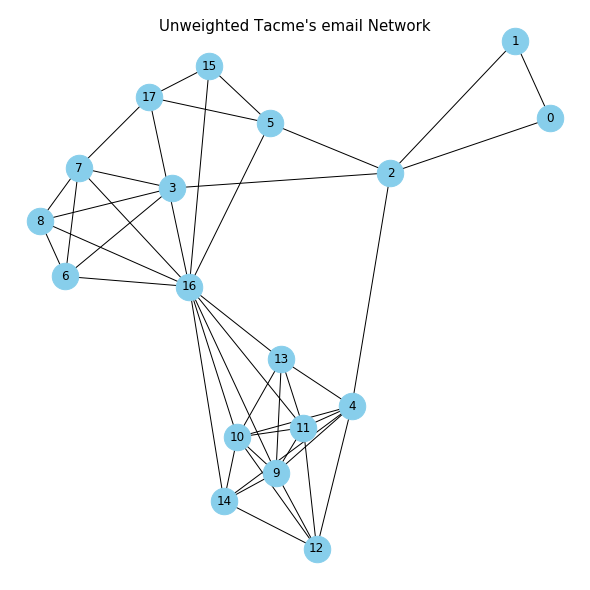

In [106]:
plt.figure(figsize=(8,8))
plt.suptitle("Unweighted Tacme's email Network", fontsize=15)


nx.draw(unweighted, with_labels=True,
        node_size=700, node_color="skyblue",
        pos=nx.fruchterman_reingold_layout(unweighted), overlap =False)



plt.show()


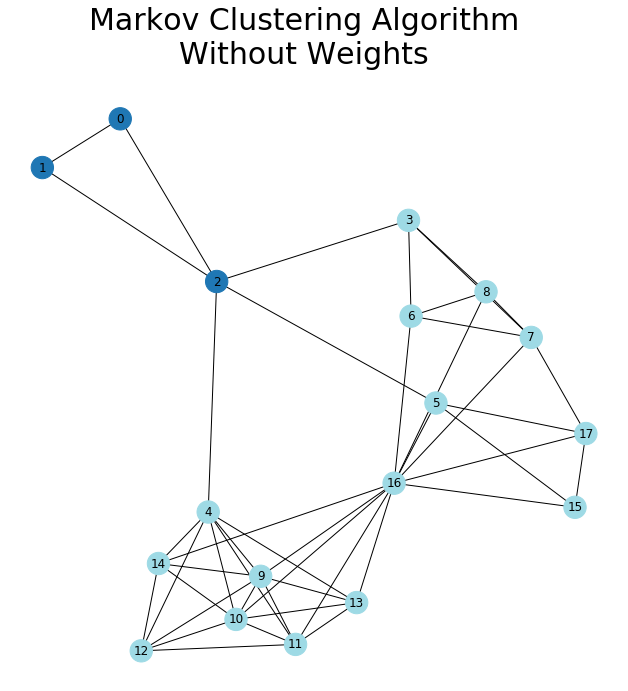

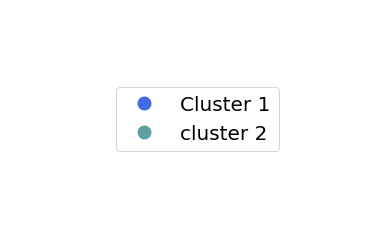

the clusters are: [(0, 1, 2), (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)]


In [118]:
# marcov unweighted

matrix = nx.to_numpy_matrix(unweighted)

result = mc.run_mcl(matrix)
clusters = mc.get_clusters(result)

plt.figure(figsize=(11,11))
plt.suptitle('Markov Clustering Algorithm\nWithout Weights', fontsize=30)
d=mc.draw_graph(matrix, clusters,
              node_size=500, with_labels=True,
              edge_color="black")


legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor='royalblue', markersize=15,
                         label = 'Cluster 1' ),
                Line2D([0], [0], marker='o',color='w', 
                       markerfacecolor='cadetblue', markersize=15,
                      label = 'cluster 2')
]
plt.show()

fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center', fontsize = 20)
plt.axis('off')
plt.show()

print('the clusters are: {}'.format(clusters))


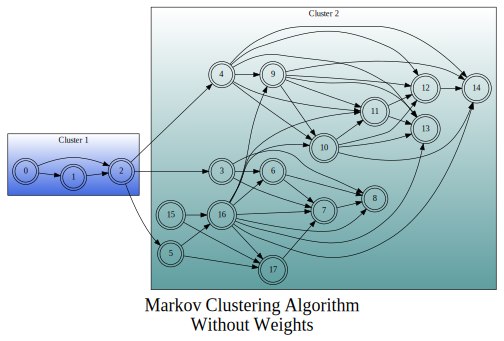

In [68]:
#Clustering according to Markov without weight

H = Digraph()
H.attr(rankdir='LR', size='7', compound='true')

H.attr('node', shape='doublecircle')
H.node('0')
H.node('1')
H.node('2')
H.node('3')
H.node('4')
H.node('5')
H.node('6')
H.node('7')
H.node('8')
H.node('9')
H.node('10')
H.node('11')
H.node('12')
H.node('13')
H.node('14')
H.node('15')
H.node('16')
H.node('17')


H.attr('node', shape='circle')

with H.subgraph(name='cluster0') as c:
    c.attr(fillcolor='royalblue:white',
           style='filled', gradientangle='90', label='Cluster 1')
    c.edges([('0','1'),('0','2'), ('1','2')])

with H.subgraph(name='cluster1') as c:
    c.attr(fillcolor='cadetblue:white',
           style='filled', gradientangle='90', label='Cluster 2')
    c.edges([('5','16'),('5','17'),('15','17'),('15','16'),('16','17'),
            ('3','6'),('3','8'),('3','7'),
             ('6','7'),('6','8'),('7','8'),
            ('4','14'), ('4','12'),('4','11'),('4','10'),('4','9'),
             ('4','13'),('9','12'),('9','10'),('9','11'),('9','13'),('9','14'),
             ('10','14'),('10','12'),('10','11'),('10','13'),('11','13'),
             ('11','12'),('12','14'), ('17', '7'),('16', '6'),('16', '7'),
             ('16', '8'),('16', '9'),('16', '11'),('16', '13'),('16', '14'),
             ('16', '10')
             
            ])
    


H.edge('2', '3')
H.edge('2', '4')
H.edge('2', '5')


H.attr(overlap='false')
H.attr(label=r'Markov Clustering Algorithm\n'
             r'Without Weights')
H.attr(fontsize='30')
H    

